 # MNIST with pytorch

In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn

In [17]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [3]:
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

## Load the data

In [4]:
batch_size = 8192
validation_size = 10000

In [5]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.ToTensor())
mnist_trainset,mnist_valset = torch.utils.data.random_split(mnist_trainset, [len(mnist_trainset)-10000,10000])
mnist_testset = datasets.MNIST(root='./data', train=False, download=True,transform=torchvision.transforms.ToTensor())

In [6]:
mnist_trainset[0][0].shape

torch.Size([1, 28, 28])

In [7]:
mnist_trainset

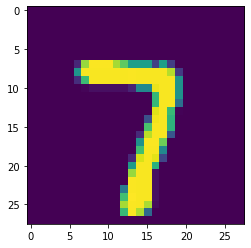

In [8]:
plt.imshow(mnist_trainset[0][0][0])

In [43]:
train_loader = DataLoader(
    mnist_trainset,
    num_workers=2,
    batch_size=batch_size,
    shuffle=True
)

val_loader = DataLoader(
    mnist_valset,
    num_workers=2,
    batch_size=len(mnist_valset),
    shuffle=True
)

In [10]:
batch_idx, (example_data, example_targets) = next(enumerate(train_loader))

In [50]:
next(train_loader)

TypeError: 'DataLoader' object is not an iterator

## define the neural net

In [11]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2,padding=0)
        self.linear1 = nn.Linear(13*13*20,100) 
        self.linear2 = nn.Linear(100,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.linear1(x.view(-1,13*13*20))
        x = self.linear2(x)
        return x

In [12]:
model = Model1()

In [13]:
model(example_data[0:4]).shape

torch.Size([4, 10])

In [46]:
optimizer = optim.SGD(model.parameters(), lr=1e-3,momentum=0.9)
loss_func = nn.CrossEntropyLoss() 
epochs = 10
val_frequency = 2

We are using CrossEntropyLoss() it did the softmax so ne need to add it in the model

In [51]:
def train(epochs,model,loader,val_loader,optimizer,loss_func,val_frequency):
    for epoch in range(epochs):
        for batch_idx, (data, targets) in enumerate(loader):
            optimizer.zero_grad()
            data.to(device)
            output = model(data)
            loss = loss_func(output, targets)
            loss.backward()
            optimizer.step()

        if (epoch == 0 or epoch%val_frequency == 0 or epoch == epochs-1):
            
            with torch.no_grad():
                _,(val_data, val_targets) = next(enumerate(train_loader))
                val_data.to(device)
                output_val = model(val_data)
                loss_val = loss_func(output_val, val_targets)

            print(f"Epoch {epoch}, loss_train {loss.item()}, loss_val {loss_val.item()}")
            
                

In [52]:
train(epochs,model,train_loader,val_loader,optimizer,loss_func,val_frequency)

Epoch 0, loss_train 0.5513596534729004, loss_val 0.543336808681488
Epoch 2, loss_train 0.5245392918586731, loss_val 0.530299186706543
Epoch 4, loss_train 0.5217263102531433, loss_val 0.5027945041656494
Epoch 6, loss_train 0.4413565993309021, loss_val 0.4917885959148407
Epoch 8, loss_train 0.5155934691429138, loss_val 0.4816036820411682
Epoch 9, loss_train 0.4727356731891632, loss_val 0.4766820967197418
